# Predicting Housing Prices with Ames Housing Data, by Yap Jun Hong (Nemo)

## Section 1: Problem Statement

### 1.1: Why Predicting Housing Prices Matter

Between 2006 and 2010, The [Ames Assessor's Office](https://www.cityofames.org/government/departments-divisions-a-h/city-assessor) collected data on houses in the city of Ames, located in Central Iowa. While the intended purpose for this dataset was for tax purposes, the dataset can also be used to predict housing prices. 

Being able to predict housing prices allows companies and consumers a quick way to gauge whether the prices being offered are fair for both parties. Even if the house sells for higher or lower than the predicted price, having a fair price that both parties can refer to can reduce psychological effects of pricing and make the bargaining process more fair. I am referring to how some companies use [comparative pricing](https://www.entrepreneur.com/article/279464) to make a price seem higher or lower. This trick works by offering a high, unfair price initially, and then lowering the price to make the lowered price seem more attractive, even if the lowered price is still higher than what's fair.

### 1.2: Business Context

In this project, I am acting as a consultant who has been asked to look through this dataset and predict housing prices for a company specialising in selling property. As they are familiar with the basics of data science, they have asked for something not too complex that they can understand. **I will run a Linear Regression model and its variants, Ridge, Lasso, and ElasticNet**, to predict the prices.

### 1.3: Inference, Knowing What Gives the Advantage

While this is a secondary goal in this notebook, linear regression has the advantage of being very well studied and explored. This means that the model is easily interpretable, which means we can figure out which features affect housing prices.

Knowing what features affect housing prices is useful for companies and consumers. For businesses, if the number of bedrooms increases house prices by a factor of 5 and the number of bathrooms increases house prices by a factor of 2, then companies can optimise for the number of bedrooms and bathrooms to build given their limited resources. Combine this knowledge with knowing which locations command the highest markup price, and companies can begin to guess which areas would be more competitive to bid for.

On the consumer side, knowing what factors are important for housing prices will help buyers learn what they should look out for. This means that buyers can ask salespersons why a house is priced the way it is and know whether the house is abnormally priced.

### 1.4: Kaggle Competition

To check how my predictions compare with other data scientists, I am also submitting my linear regression model to a kaggle competition. **Models are scored based on Root Mean Squared Error**.

### 1.5: The Dataset

The dataset used here is the Ames Housing Dataset. To my knowledge, it was released in 2018. As mentioned above, it is housing data from 2006 and 2010.

This dataset has [81 columns](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and is split into a training and test set. Both sets have 80 columns in common, with the test set having the target variable, 'Sales Price', removed. 

While the dataset has too many features to list here, a list of important features is summarised below.

### 1.6: Measuring Success

Success will be measured by comparing my model's predictions with the provided test set. The difference between the two will be measured using Root Mean Squared Error (RMSE) in Kaggle. In part, this is for convenience as it's the metric used in the Kaggle competition, but it's also useful as it's more sensitive to outliers than, say, Mean Absolute Error. As this data question involves housing and prices, there is bound to be right-skewed data, with some houses being priced much higher than others.




## Section 2: Executive Summary

**Information here**

## Section 3: Preprocessing/Data Cleaning

### 3.01: Import everything and set display options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
ames_df = pd.read_csv('../datasets/train.csv')

In [4]:
ames_test = pd.read_csv('../datasets/test.csv')

### 3.1: Cleaning column names and getting an overview of the data with info and describe

In [5]:
#Get Number of rows and columns for training data
ames_df.shape

(2051, 81)

In [6]:
#Get Number of rows and columns for test data
ames_test.shape

(879, 80)

In [7]:
#Show first few rows to check columns
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
#Change columns to lowercase and replace spaces with underscore
ames_df.columns = [col.lower().replace(' ', '_') for col in ames_df.columns]
ames_test.columns = [col.lower().replace(' ', '_') for col in ames_test.columns]
ames_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [15]:
#Dropping id and pid columns as these are simply identifier columns. They do not give any insight to the data

ames_df.drop(columns=['id', 'pid'], inplace=True)
ames_test.drop(columns=['id', 'pid'], inplace=True)

In [16]:
#Describing the data
ames_df.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


It seems there's many columns with 0 values. Some of these make sense, as 0 just means that there is no such room. For example, a 'bsmt_full_bath' of 0 (discrete variable) means there is no full bath at all. For a continuous example, '2nd_flr_sf' of 0 just means there is no 2nd floor!

In [17]:
#Info to get a summary of null value counts and data type
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     1721 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   alley            140 non-null    object 
 6   lot_shape        2051 non-null   object 
 7   land_contour     2051 non-null   object 
 8   utilities        2051 non-null   object 
 9   lot_config       2051 non-null   object 
 10  land_slope       2051 non-null   object 
 11  neighborhood     2051 non-null   object 
 12  condition_1      2051 non-null   object 
 13  condition_2      2051 non-null   object 
 14  bldg_type        2051 non-null   object 
 15  house_style      2051 non-null   object 
 16  overall_qual     2051 non-null   int64  
 17  overall_cond  

There's nothing wrong with the data types. However, there are some columns with null values, including some with many nulls.

### 3.2: Checking through Null values

The first thing to do is to handle the nulls. The linear regression models used later cannot handle null values.

In [18]:
#Counting null values

ames_df.isnull().sum()

ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc            0
central_air           0
electrical      

It seems 'alley', 'fireplace_qu', 'pool_qc', 'fence', and 'misc_feature' all have more than 500 null values. They are candidates for removal.

The following columns have some null values, but not that many. 

'lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 

'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 

'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 

'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond'

Let's work our way down the list, exploring the data with the most nulls to the least null data, and starting with the categorical data and working down to numerical data

Note that for the following cells, the same action will be done to both the training set (ames_df) and the test set (ames_test)

In [19]:
#pool_qc refers to pool quality. This assumes that there is a pool in the house, which does not hold most of the time
#Ex: Excellent, Gd: Good, and so on until NA, no pool
#While replacing NA with no pool is possible, the fact that most of these data are no pool means that there isn't much 
#information associated with having a pool
print(ames_df['pool_qc'].unique())
ames_df.drop(columns='pool_qc', inplace=True)
ames_test.drop(columns='pool_qc', inplace=True)

[nan 'Fa' 'Gd' 'Ex' 'TA']


In [20]:
#misc_feature refers to miscellaneous features not covered in other categories.
#Elev: Elevator, Gar2: 2nd Garage
#I'm removing this because most of the rows don't have anything special about them
ames_df.drop(columns='misc_feature', inplace=True)
ames_test.drop(columns='misc_feature', inplace=True)

In [21]:
#alley refers to type of alley access to the property
#Grvl: Gravel, Pave: Paved, NA: No alley access
#No alley access does hold some information. I think I'll change nan to "Noalley"
ames_df.loc[ames_df['alley'].isna(), 'alley'] = "Noalley"
ames_test.loc[ames_test['alley'].isna(), 'alley'] = "Noalley"
ames_df['alley'].unique()

array(['Noalley', 'Pave', 'Grvl'], dtype=object)

In [22]:
#fence refers to the fence quality. This assumes there is a fence around the house.
#The values range from Good-Minimum privacy, Good-Minimum Wood/Wire, and No Fence
#More hesitant to remove this. There may be some good to keeping this feature. NA refers to No Fence, so there's value
#in keeping this
ames_df.loc[ames_df['fence'].isna(), 'fence'] = "Nofence"
ames_test.loc[ames_test['fence'].isna(), 'fence'] = "Nofence"
ames_df['fence'].unique()

array(['Nofence', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [23]:
#fireplace_qu refers to the quality of the fireplace. Around half of the rows don't have a value, but that's because
#NA refers to "No Fireplace". Maybe replacing that with a value called "No_fp" would be more useful
#This feature should be kept and cleaned
ames_df.loc[ames_df['fireplace_qu'].isna(), 'fireplace_qu'] = "No_fp"
ames_test.loc[ames_test['fireplace_qu'].isna(), 'fireplace_qu'] = "No_fp"
ames_df['fireplace_qu'].unique()

array(['No_fp', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

Unlike the other variables above with 'nan', mas_vnr_type has both "None", which refers to "No Masonry veneer type", and nan. I will impute with the most frequent value by using .fillna()

In [24]:
ames_df['mas_vnr_type'].fillna(ames_df['mas_vnr_type'].value_counts().idxmax(), inplace=True)
ames_test['mas_vnr_type'].fillna(ames_test['mas_vnr_type'].value_counts().idxmax(), inplace=True)
ames_df['mas_vnr_type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

For the rest of the missing values, since there aren't that many of them, I will impute them with the median if they are numerical values. If they are categorical values, I will impute them with the centre value (median)

In [25]:
def custom_imputer(dataframe):
    """
    Input: A Pandas Dataframe
    Output: Modified Dataframe
    
    For each dataframe[column], first, try filling up the values with the median. This will work if the column is
    a numerical variable. If the variable is categorical, it will throw up an error. In that case, fill up the column
    with the most frequent value counts. inplace=True to replace the dataframe
    """
    for column in dataframe:
        try:
            dataframe[column].fillna(dataframe[column].median(), inplace=True)
        except:
            dataframe[column].fillna(dataframe[column].value_counts().idxmax(), inplace=True)
    return dataframe

In [26]:
custom_imputer(ames_df)
custom_imputer(ames_test)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,No_fp,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,Nofence,0,4,2006,WD
1,90,RL,68.0,9662,Pave,Noalley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,No_fp,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,Nofence,0,8,2006,WD
2,60,RL,58.0,17104,Pave,Noalley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,Nofence,0,9,2006,New
3,30,RM,60.0,8520,Pave,Noalley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,No_fp,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,Nofence,0,7,2007,WD
4,20,RL,68.0,9500,Pave,Noalley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,Nofence,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,60,RL,80.0,8000,Pave,Noalley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,Nofence,0,11,2007,WD
875,60,RL,90.0,14670,Pave,Noalley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,MnPrv,0,8,2008,WD
876,20,RL,55.0,8250,Pave,Noalley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,Nofence,0,8,2008,WD
877,20,RL,60.0,9000,Pave,Noalley,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,No_fp,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,GdWo,0,5,2007,WD


Checking for any null values left with the sum of the sums of null counts

In [27]:
ames_df.isnull().sum().sum()

0

In [28]:
ames_test.isnull().sum().sum()

0

### 3.3: Checking for duplicates

In [29]:
#Using the .duplicated() method and masking to check for duplicates
ames_df[ames_df.duplicated()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


There are no duplicates in the Ames dataset.

### 3.4: Outlier detection and scaling variables

The data dictionary provided by the creator of this dataset, De Cock, says that there are 5 outliers. These outliers can be detected by drawing a graph, plotting saleprice against gr_liv_area. I will do that below.

In [30]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

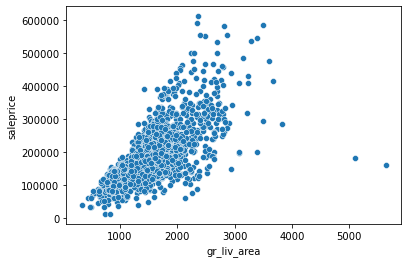

In [31]:
#Plotting gr_liv_area against saleprice
sns.scatterplot(x=ames_df['gr_liv_area'], y=ames_df['saleprice']);

The data seems to have been cleaned. There are only 2 data points that are potential outliers. Regardless, I will take a look at the two points and determine what to do with them.

In [32]:
#Finding the rows that contain the outliers
ames_df[ames_df['gr_liv_area']>4000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,60,RL,313.0,63887,Pave,Noalley,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Nofence,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,Noalley,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,Nofence,17000,10,2007,New,183850


In [33]:
#Dropping the rows
ames_df.drop([960, 1885], inplace=True)

In [34]:
#Checking to make sure the rows have really been removed
ames_df[ames_df['gr_liv_area']>4000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [35]:
#Resetting index
ames_df.reset_index(drop=True, inplace=True)

### 3.5: Checking Correlations between predictors and removing highly correlated predictors

Let's draw a heatmap to check for correlation between predictors

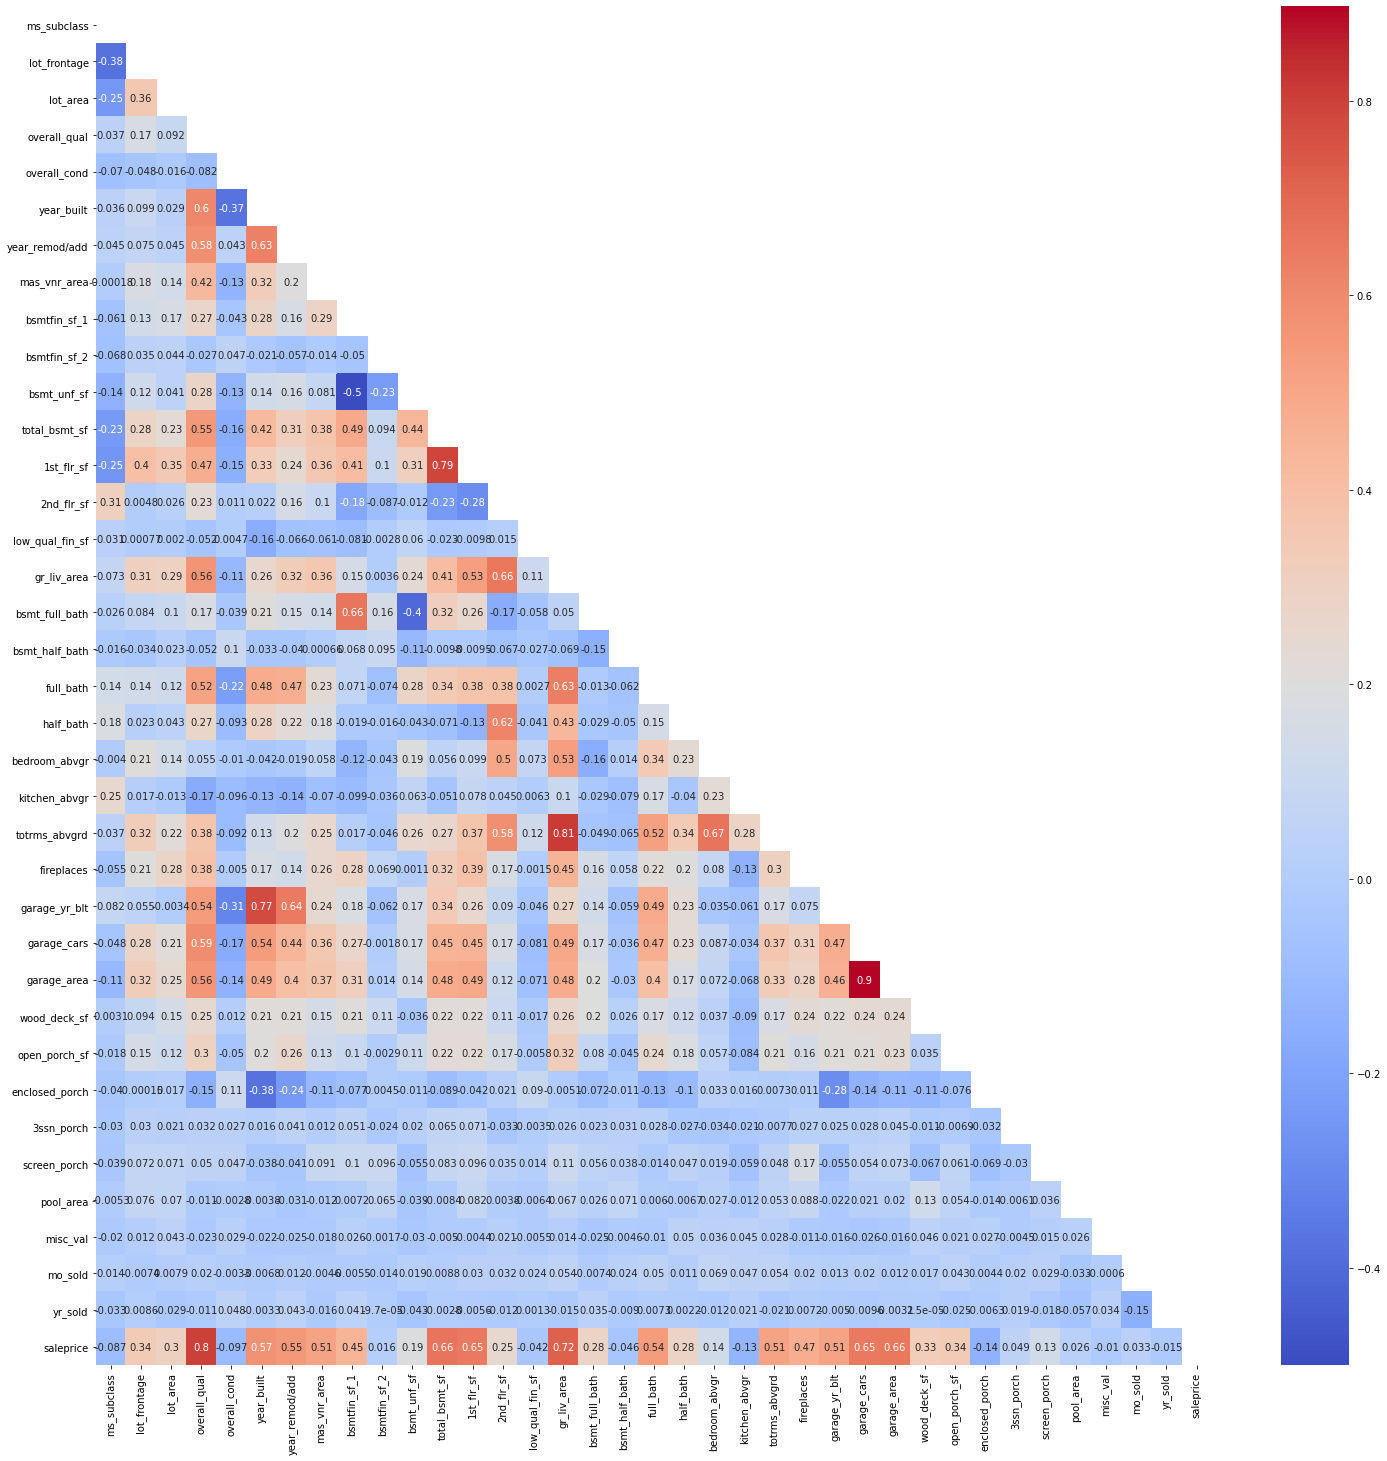

In [36]:
#Draw a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(ames_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plotting the heatmap with annotations
plt.figure(figsize=(25, 25))
sns.heatmap(ames_df.corr(), mask=mask, annot=True, cmap='coolwarm');

#### Correlations between response variable and predictor variables

The last row of the heatmap shows the correlations between the predictor variables and the response variable, saleprice.

The following variables are highly positively correlated (>0.75) with saleprice.

|**Index**|**Highly Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|overall_qual|0.8|

The following variables are positively correlated (>0.50) with saleprice.

|**Index**|**Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|year_built|0.57|
|2|year_remod/add|0.55|
|3|mas_vnr_area|0.51|
|4|total_bsmt_sf|0.66|
|5|1st_flr_sf|0.65|
|6|gr_liv_area|0.72|
|7|full_bath|0.54|
|8|totrms_abvgrd|0.51|
|9|garage_yr_blt|0.51|
|10|garage_cars|0.65|
|11|garage_area|0.66|

There do not seem to be negatively correlated variables with the response variable.

#### Correlations between predictor variables

These variables have >0.75 correlation between them

|**Index**|**Variable 1**|**Variable 2**|
|---|---|---|
|1|garage_yr_blt|year_built|
|2|totrms_abvgrd|gr_liv_area|
|3|garage_area|garage_cars|
|4|1st_flr_sf|total_bsmt_sf|

In [38]:
ames_df.to_csv('../datasets/ames_df_cleaned.csv')

In [39]:
ames_test.to_csv('../datasets/ames_test_cleaned.csv')